# **Introdução**

Nos dias 19 a 24 de outubro de 2020, os instrutores da Alura, organizou um evento de Analise de Dados no Enem 2019.

Foram cinco aulas, abordando assuntos sobre  DataScience.
Os temas foram distribuidos da seguinte maneira:

1.   **Dia 1: Dados da Educação**
2.  **Dia 2: Análise Exploratória de Dados**
3.  **Dia 3: Distribuições e Correlações**
4.   **Dia 4: Machine Learning**
5.  **Dia 5: Validação de Modelo**



# Aula 01 - Dados da Educação

**Bibliotecas** **e** **Carregando** **Dados**

In [ ]:
import pandas as pd
import numpy as np

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados.shape

(127380, 136)

In [ ]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [ ]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
dados.columns.values
#retornando o valor de todas as colunas

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
dados[["SG_UF_RESIDENCIA", "Q025"]].head()

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B


In [ ]:
len(dados['SG_UF_RESIDENCIA'].unique())

27

In [ ]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Total de participantes do enem por estado, sendo São Paulo com o maior número de participantes

In [ ]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Identificando quantos participantes tempo de cada idade. 
Quatro participantes de 13 anos fizeram as provas 

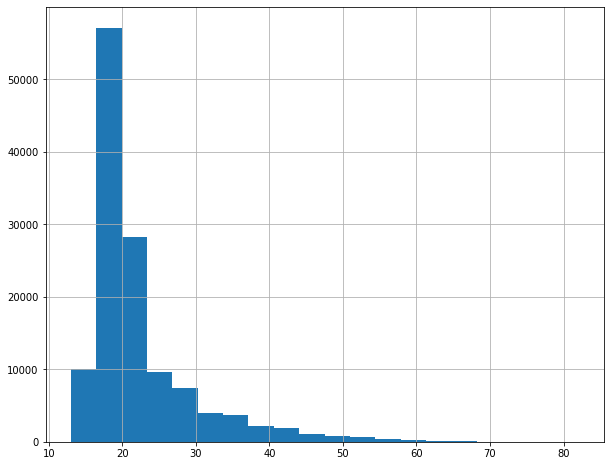

In [ ]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))

A maior participação é entre as idades de 17 a 20 anos

In [ ]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Quantidade de treineiros durante o Enem

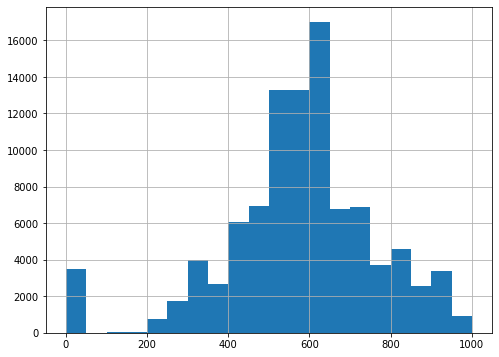

In [ ]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

Gráfico da Redação, podemos perceber que muitos participantes tiraram nota 0.

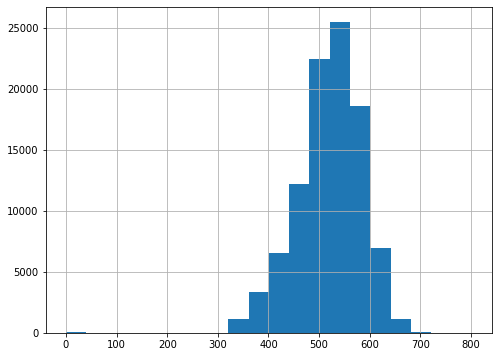

In [ ]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

Gráfico das notas da matéria de Linguagens e Códigos

In [ ]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

Média das notas de redação

In [ ]:
dados["NU_NOTA_REDACAO"].std()

188.07645455751802

Desvio Padrão das notas de redação

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [ ]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

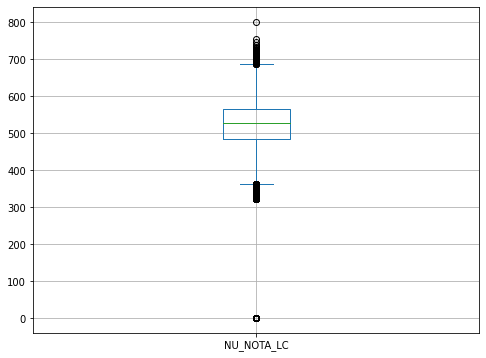

In [ ]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

As notas de Linguagem e Código ficaram na média entre 483 e 565

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


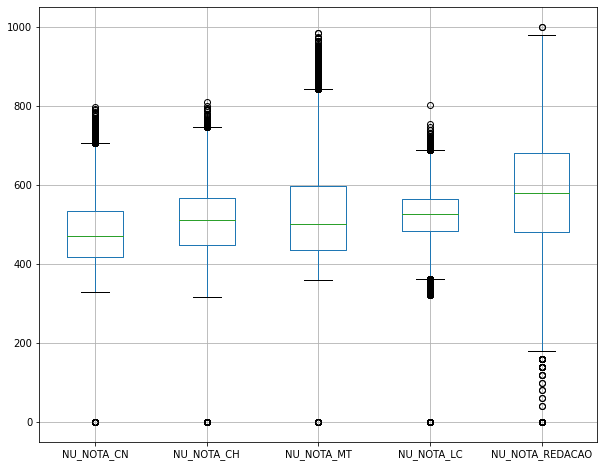

In [ ]:
dados[provas].boxplot(grid=True, figsize= (10,8))

Gráfico demostrando a maior concetração das notas

# Aula 02 - Análise Exploratória de Dados

In [ ]:
dados.query("NU_IDADE == 13")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
MT     4
AM     4
DF     4
TO     3
SE     3
PR     3
AL     2
RO     2
SC     2
AP     1
RN     1
ES     1
AC     1
RS     1
RJ     1
MS     1
Name: SG_UF_RESIDENCIA, dtype: int64

Todos os participantes com menos ou igual a 14 anos.
Pernambuco tem no total de 18 participantes.

In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
TO    0.020690
SE    0.020690
PR    0.020690
AL    0.013793
RO    0.013793
SC    0.013793
AP    0.006897
RN    0.006897
ES    0.006897
AC    0.006897
RS    0.006897
RJ    0.006897
MS    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

Aqui temos as porcentagens.
Pernambuco com 12%

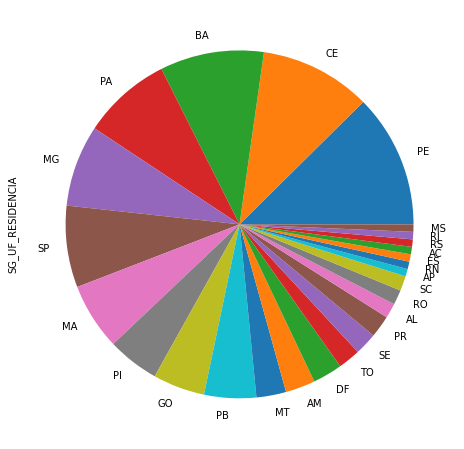

In [ ]:
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))

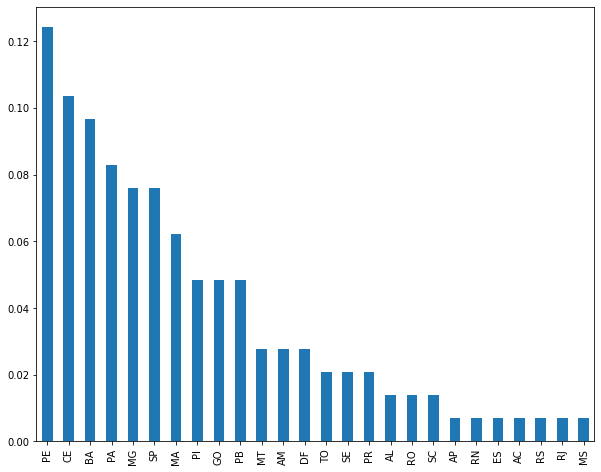

In [ ]:
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))

In [ ]:
len(alunos_menor_quartoze)

145

Total de participantes com 14 anos 

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

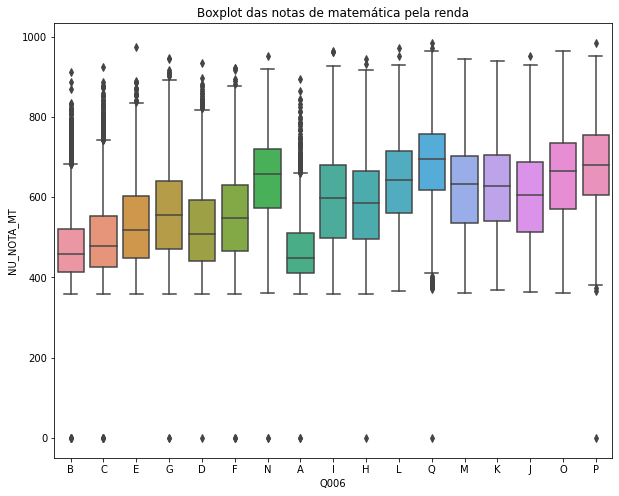

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)
plt.title("Boxplot das notas de matemática pela renda")

Gráfico das notas de matemática pela renda

In [ ]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

In [ ]:
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

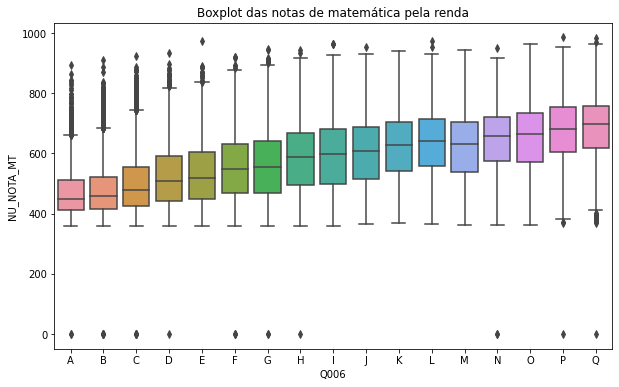

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

Observamos que quanto maior a renda, maior é a nota em matemática.

In [ ]:
dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

Notas totais de todas as matérias que cairam na prova

In [ ]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

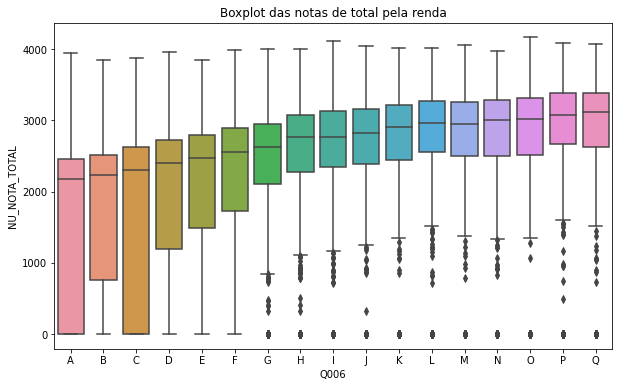

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Percebemos que as classe inferiores tem mais notas 0. 

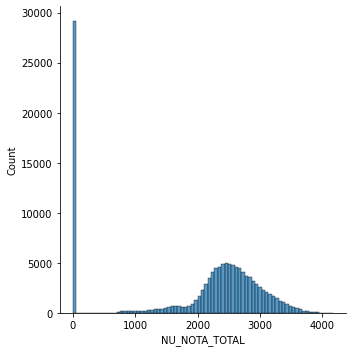

In [ ]:
sns.displot(dados, x ="NU_NOTA_TOTAL")

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Removendo todas as notas 0

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

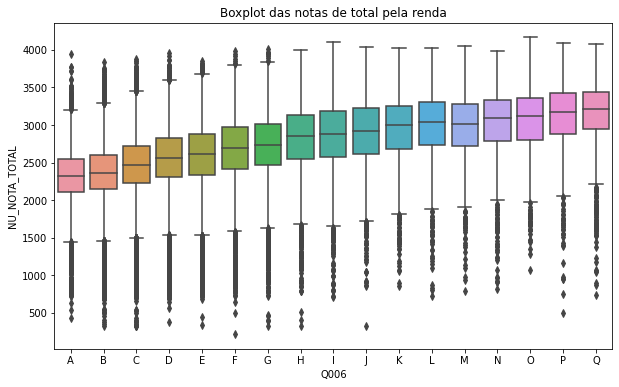

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Observamos que a Classe A, que é a mais inferior, tem média de notas totais 2100 a 2550. 

Enquanto a Classe Q, que é a superior, tem média de notas totais entre 2900 a 3400

Text(0.5, 1.0, 'Boxplot das notas de total pela renda')

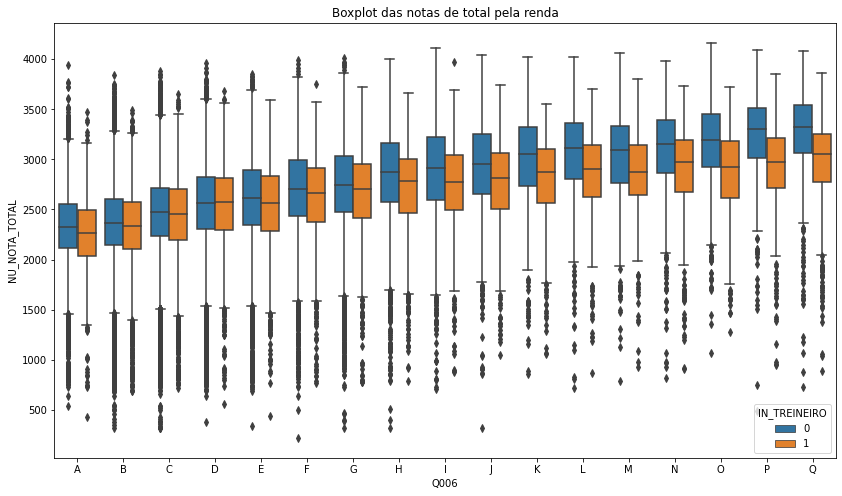

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas de total pela renda")

Gráfico entre particantes e treineiros.
Treineiros sempre tem notas menores que participantes.

# Aula 03 - Distribuições e Correlações

Distribuição das notas usando média mediana e a moda

In [ ]:
notas_enem_2019 = dados_sem_notas_zero['NU_NOTA_TOTAL']

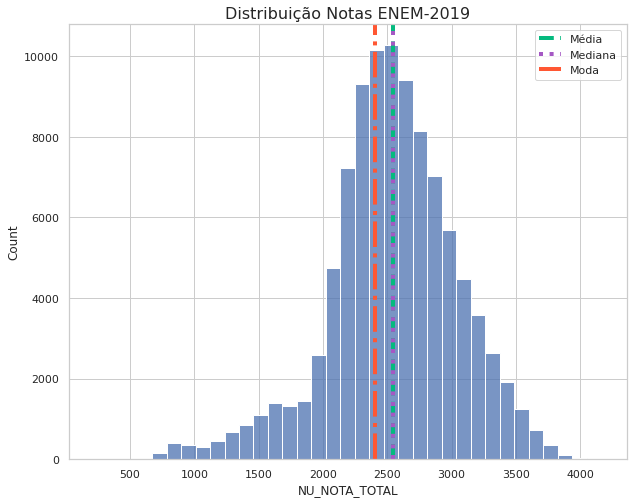

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
enem_media_nota = plt.axvline(x = notas_enem_2019.mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_nota = plt.axvline(x = notas_enem_2019.median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_nota = plt.axvline(x = notas_enem_2019.mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_nota, enem_mediana_nota, enem_moda_nota], ['Média', 'Mediana', 'Moda'])
sns.histplot(notas_enem_2019, bins = 35).set_title('Distribuição Notas ENEM-2019', fontsize = 16);

Média, moda e mediana das Notas totais da prova

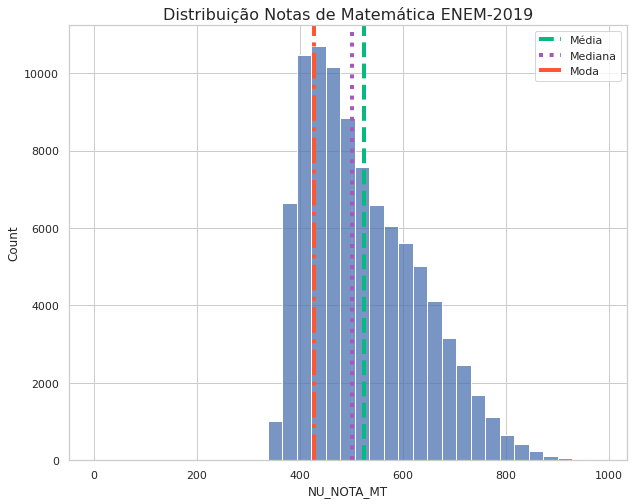

In [ ]:
notas_enem_2019_MT = dados_sem_notas_zero['NU_NOTA_MT']

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
enem_media_nota_MT = plt.axvline(x = notas_enem_2019_MT.mean(), c = "#05BA7F", linewidth = 4, linestyle = '--')
enem_mediana_nota_MT = plt.axvline(x = notas_enem_2019_MT.median(), c = "#A558C4", linewidth = 4, linestyle = ':')
enem_moda_nota_MT = plt.axvline(x = notas_enem_2019_MT.mode()[0], c = "#FF5733", linewidth = 4, linestyle = '-.')
plt.legend([enem_media_nota_MT, enem_mediana_nota_MT, enem_moda_nota_MT], ['Média', 'Mediana', 'Moda'])
sns.histplot(notas_enem_2019_MT, bins = 35).set_title('Distribuição Notas de Matemática ENEM-2019', fontsize = 16);

Média, moda e mediana das notas da prova de matematica

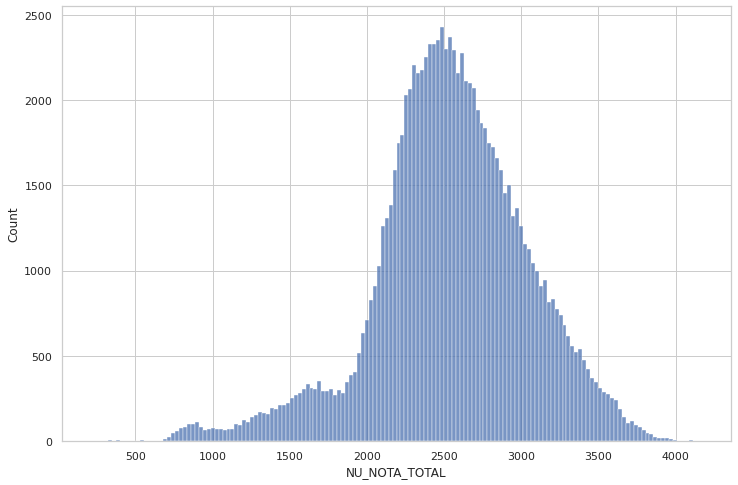

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

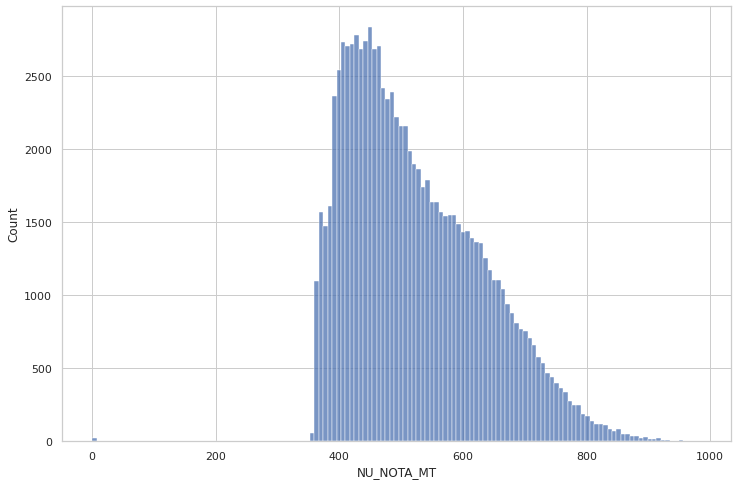

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_MT")

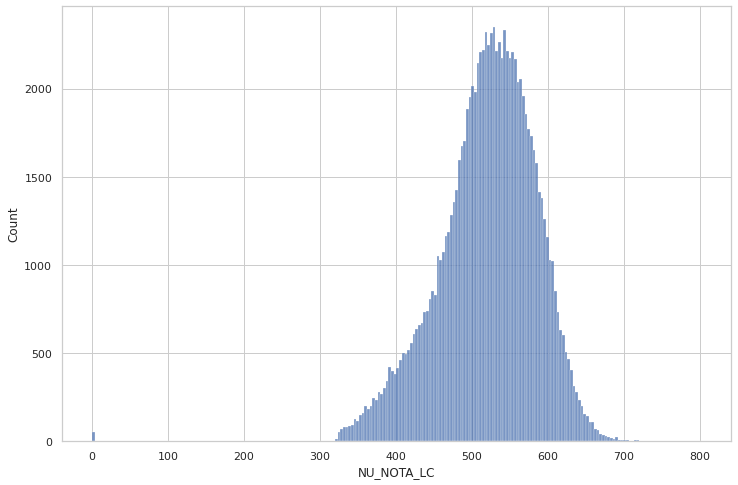

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_LC")

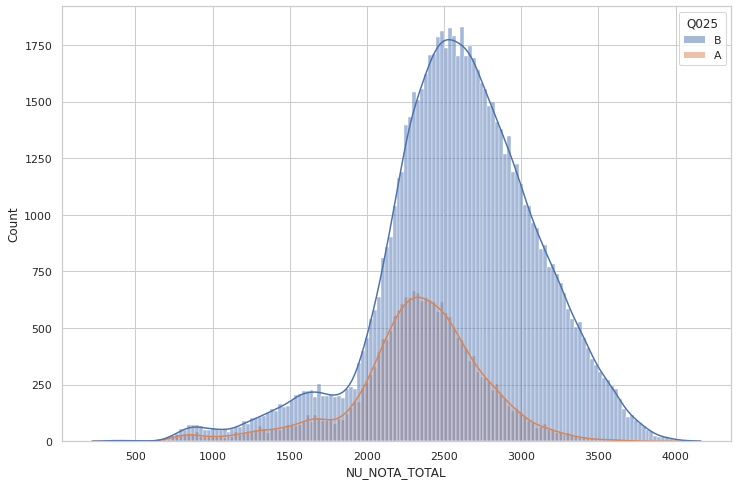

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)

In [ ]:
acesso_internet = {
    'A': 'Não',
    'B': 'Sim'
}

In [ ]:
dados_internet = dados_sem_notas_zero.copy()
dados_internet['Q025_RESPOSTA'] = [acesso_internet[resposta] for resposta in dados_internet.Q025]

dados_internet[['Q025', 'Q025_RESPOSTA']]

,Q025,Q025_RESPOSTA
0,B,Sim
1,B,Sim
2,B,Sim
3,B,Sim
4,B,Sim
...,...,...
127375,B,Sim
127376,B,Sim
127377,B,Sim
127378,A,Não


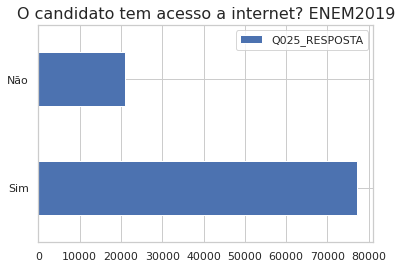

In [ ]:
tinham_acesso_internet = pd.DataFrame(dados_internet['Q025_RESPOSTA'].value_counts())
tinham_acesso_internet.plot.barh().set_title('O candidato tem acesso a internet? ENEM2019',  fontsize = 16);

In [ ]:
tinham_acesso_internet = pd.DataFrame(dados_internet['Q025_RESPOSTA'].value_counts(normalize =True)*100)
tinham_acesso_internet

,Q025_RESPOSTA
Sim,78.650553
Não,21.349447


78.6% dos participantes do Enem tinham acesso a Internet

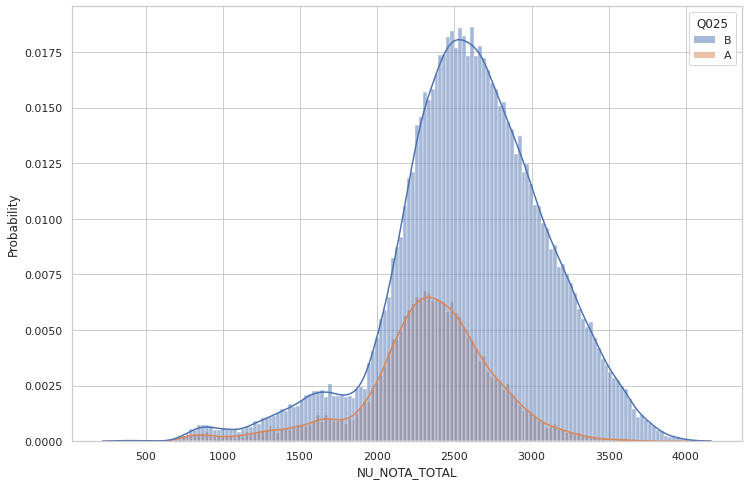

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

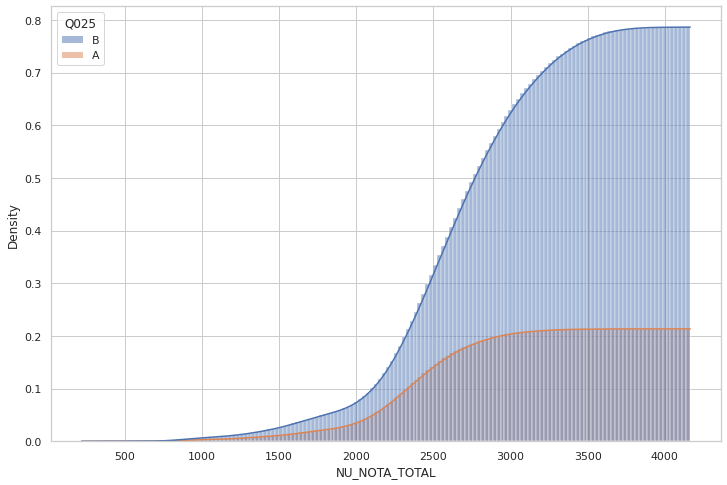

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

In [ ]:
internet_ordenada = dados_internet["Q025_RESPOSTA"].unique()
internet_ordenada.sort()

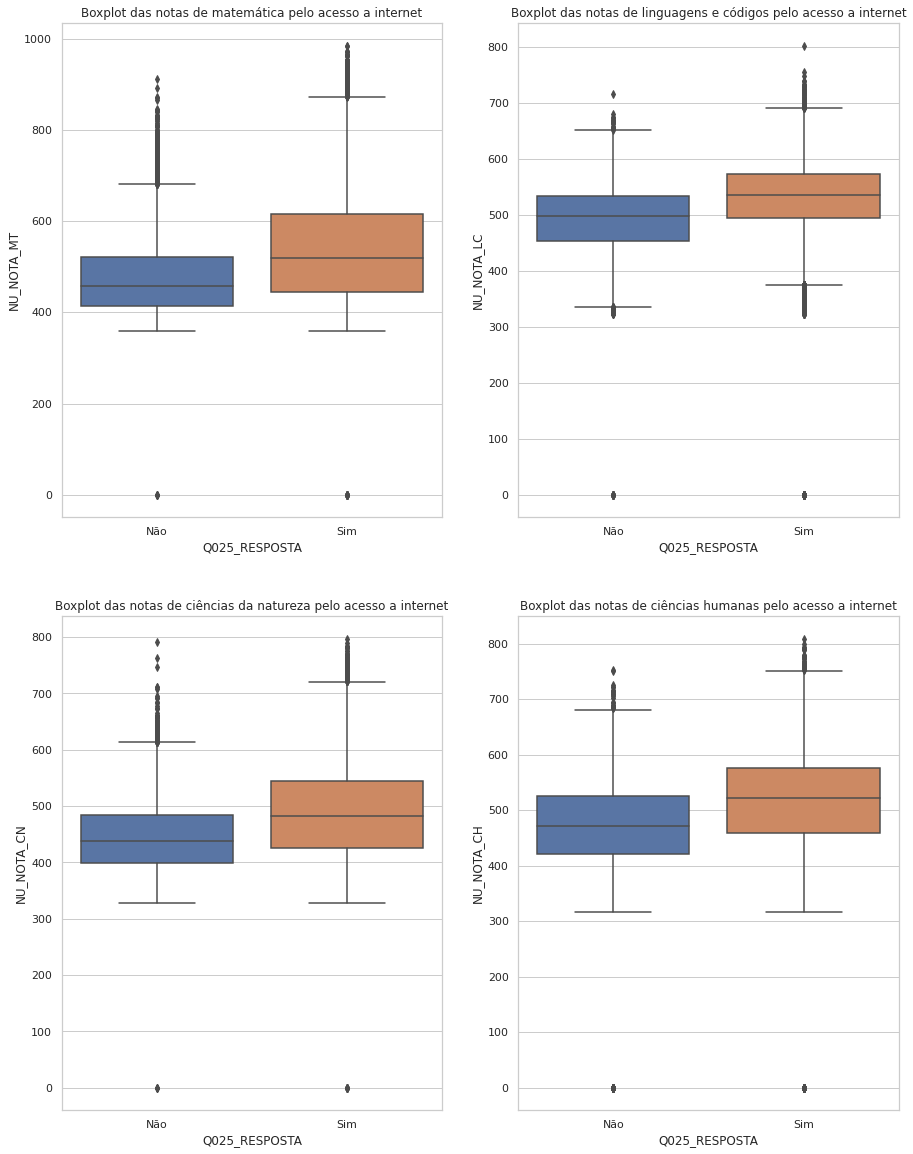

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_MT", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de matemática pelo acesso a internet");

plt.subplot(2, 2, 2)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_LC", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de linguagens e códigos pelo acesso a internet");

plt.subplot(2, 2, 3)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_CN", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de ciências da natureza pelo acesso a internet");

plt.subplot(2, 2, 4)
sns.boxplot(x="Q025_RESPOSTA", y = "NU_NOTA_CH", data = dados_internet, order = internet_ordenada)
plt.title("Boxplot das notas de ciências humanas pelo acesso a internet");

(-50.0, 1050.0)

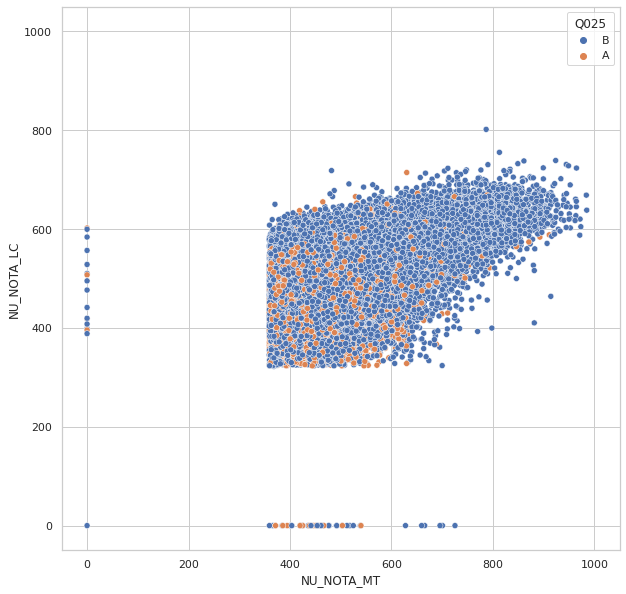

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Correlação entre Matemática e Linguagens e Códigos.
Não há grandes correlações entre elas.

In [ ]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

3 formas de visualizar as correlações

 - pairplot
 - correlacao
 - heatmap

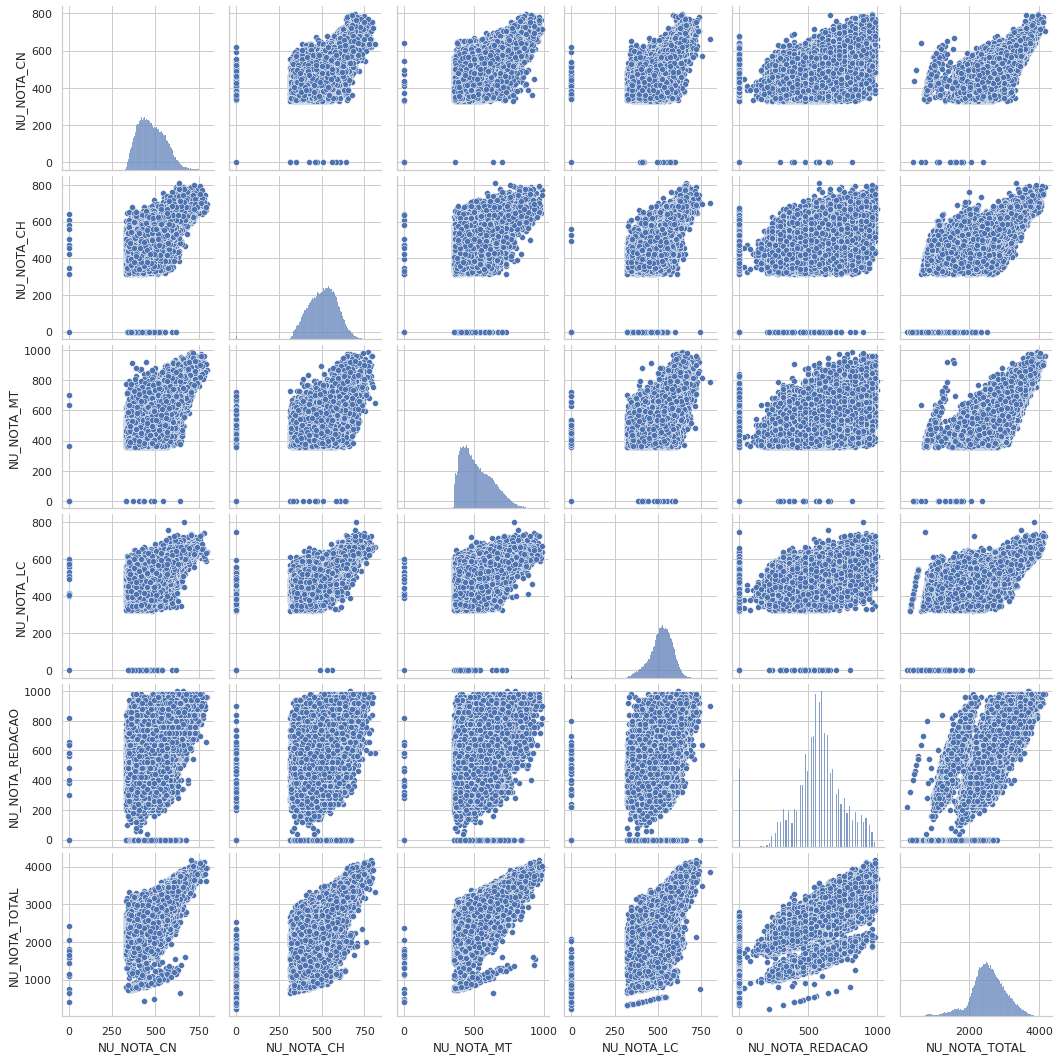

In [ ]:
sns.pairplot(dados_sem_notas_zero[provas])

In [ ]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


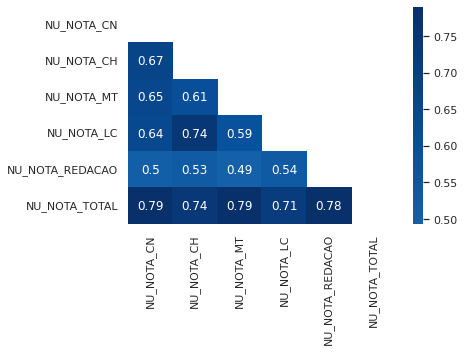

In [ ]:
mask = np.triu(np.ones_like(dados_sem_notas_zero[provas].corr(), dtype=bool))
sns.heatmap(correlacao, mask=mask, cmap="Blues", center=0, annot=True,)

# Aula 04 - Machine Learning

In [ ]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]


In [ ]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [ ]:
x = notas_entrada
y = notas_saida 

Separando o x e y para fazer o teste e treino

Separando para treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

Regressão Linear

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(random_state=4321)

In [ ]:
predicoes_matematica = modelo.predict(x_teste)

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

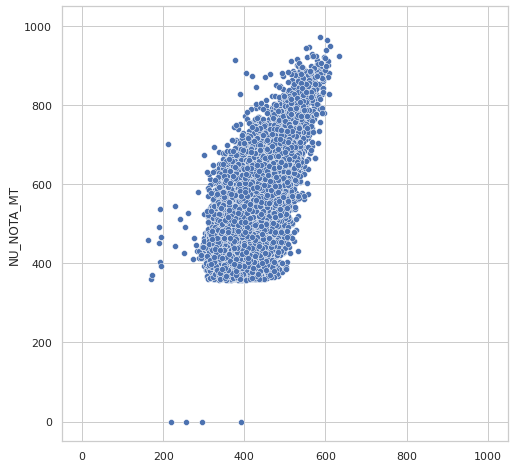

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

como não tem uma linha reta, temos um erros

(-50.0, 1050.0)

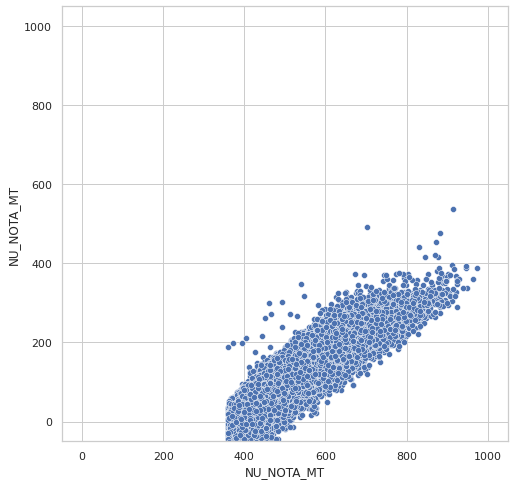

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

gráfico mostrando os erros da regressão linear

Média da nota de entrada

(-50.0, 1050.0)

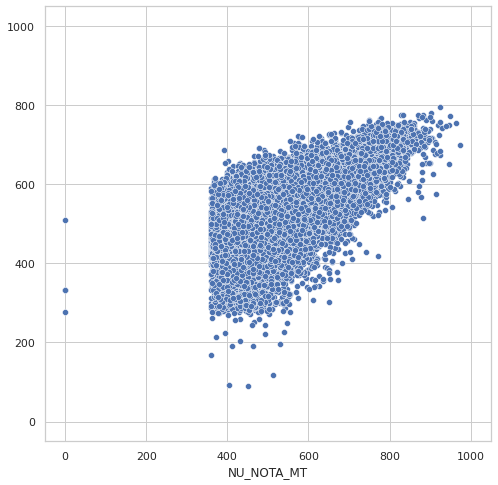

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados['Previsão'] = predicoes_matematica
resultados["Diferença"] = resultados["Real"] - resultados['Previsão']
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsão"])**2 #tirando o negativo resultado diferenca

In [ ]:
resultados

,Real,Previsão,Diferença,quadrado_diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [ ]:
resultados["quadrado_diferenca"].mean()

18324.11972400897

In [ ]:
resultados["quadrado_diferenca"].mean()**(1/2)
# o nosso modelos esta errando 135

135.36661229420264

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes) #usando o y_teste e a previsão

12063.645588509502

In [ ]:
mean_squared_error(y_teste, predicoes_matematica)
#mesmo erro do SVM

18324.11972400897

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_treino, y_treino)
lr_predicoes = lr.predict(x_teste)

In [ ]:
mean_squared_error(y_teste, lr_predicoes)

5961.372212400363

# Aula 05 - Validação de Modelo

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED) #precisa do random para não precisar da aleatoriedade
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


18324.11972400897

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3) 
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

6040.28518585475

temos que tentar reduzir as aleatoriedades

In [ ]:
from sklearn.model_selection import cross_validate #para comparar os modelos

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error") #dentro da documentação comeca com neg # cv = quantos resultados
media = (resultados["test_score"]*-1).mean() #tirando o numero negativo
media

6558.227664658773

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std() #desvio padrão
lim_inferior = media - (2*desvio_padrao) #limite inferior
lim_superior = media + (2*desvio_padrao) #limite superior

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536813 - 7100.732779780728


In [ ]:
resultados["test_score"]*-1

array([6118.6911947 , 6536.09830186, 6338.64260896, 6456.70685686,
       6234.97203593, 6794.25120283, 6713.45694262, 6693.04880297,
       6610.58461646, 7085.82408339])

função

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 6015.722549536806 - 7100.732779780732


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
import numpy as np

SEED= 1232
np.random.seed(SEED) 
#retorna os mesmos dados


partes = KFold(n_splits = 10, shuffle=True) #quantas partes queremos no nossos dados #shuffle embaralhando os dados
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


In [ ]:
#mudando os max_depth
# quanto mais profundo melhor o resultado
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True) # retorna dados de treino e teste
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5760.834451245899|Teste = 5815.707286597402


In [ ]:
#um for para todas as vezes que modifico o meu max_depth
for i in range(1,21):
    regressor_arvore(i)

#treino melhorou 
#já o teste não melhorou a profundidade 7 é a melhor

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.958714168911
Treino = 4598.125022484774|Teste = 6216.553608637031
Treino = 4316.3791662866815|Teste = 6514.07032957674
Treino = 4000.6209880837496|Teste = 6848.344737600635
Treino = 3655.8197526274853|Teste = 7235.435245488157
Treino = 3295.832684540846|Teste = 7633.948584409428
Treino = 2931.7212612043872|Teste = 8059.378759944782
Treino = 2575.59534021339|Teste = 8435.937377688437
Treino = 2233.5742434614776|Teste = 8819.086